In [ ]:
import pandas as pd 
from sklearn.svm import SVR 
import numpy as np
from sklearn.model_selection import train_test_split 
# Regression scales both x and y 
# classification only X 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Resources-20221014/diabetes.csv')

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.Outcome.value_counts() # Because the outcome is not distrubuted well, we must stratify the data

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X = df.drop('Outcome', axis=1) 
y = df['Outcome']

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X = scaler.fit_transform(X)


In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y, 
                                                  test_size =.2,
                                                  random_state=20, 
                                                  stratify=y)

# DT Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(X_train,y_train)

1.0

In [ ]:
DT.score(X_test,y_test) #since train score is higher than test == overfitting

0.7597402597402597

In [ ]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,RandomTreesEmbedding, GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
           n_estimators=500, 
           max_samples = .8, 
           oob_score=True,
           random_state=0)

In [ ]:
bag_clf.fit(X_train,y_train)
bag_clf.score(X_train,y_train)

1.0

In [ ]:
bag_clf.oob_score_

0.745928338762215

In [ ]:
bag_clf.score(X_test,y_test)

0.7987012987012987

In [ ]:
bag_clf2 = RandomForestClassifier(n_estimators=500)
       

In [ ]:
bag_clf2.fit(X_train,y_train)
bag_clf2.score(X_train,y_train)

1.0

In [ ]:
bag_clf2.score(X_test,y_test)

0.7792207792207793

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

RFC = RandomForestClassifier(n_estimators = 500)
RFC.fit(X_train,y_train)
RFC.score(X_test,y_test) 

0.7727272727272727

# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=500, random_state=0, 
                             learning_rate=.1)

In [ ]:
ADC_grid = {'learning_rate': [range(.1,1)]
            }

TypeError: ignored

In [ ]:
ada_clf.fit(X_train,y_train)
ada_clf.score(X_test,y_test)

0.8116883116883117

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
grd_clf = GradientBoostingClassifier(n_estimators=500,
                                     learning_rate=1,
                                     random_state=0)
grd_clf.fit(X_train,y_train)
grd_clf.score(X_test,y_test)

In [ ]:
grd_clf.fit(X_train,y_train)
grd_clf.score(X_test,y_test)

0.7662337662337663

# Confusion Matrix and Classification Report 

In [ ]:
y_pred_ada = ada_clf.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [ ]:
cmd = confusion_matrix(y_test,y_pred_ada)

In [ ]:
cmd

In [ ]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       100
           1       0.79      0.63      0.70        54

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



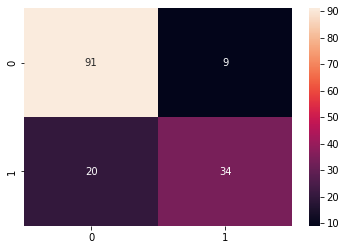

In [ ]:
import seaborn as sns
sns.heatmap(cmd, annot=True)

# ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr,thresh = roc_curve(y_test,y_pred_ada)



Text(0, 0.5, 'True Positive Rate')

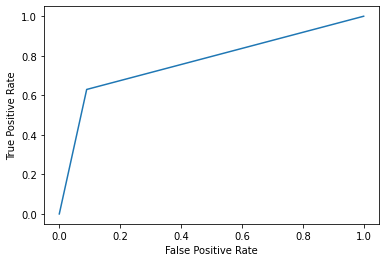

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


In [ ]:
roc_auc_score(y_test,y_pred_ada)

0.7698148148148148